# Classifying Digits with Artificial Neural Networks

This notebook will contain all code for the 09/25/2023 meeting: Classifying Digits with Artificial Neural Networks.

All cells are commented accordingly. If you have any questions, feel free to dm me on Discord or ask me in the next meeting!

**Reminder, to speed up training, we leverage GPUs. GPUs allow for parrallel computing so it speeds up our training process. To ensure you are using GPUs, make sure to change Runtime type to GPU. This can be done by clicking on Runtime -> Change runtime type -> GPU**

In [ ]:
# Importing libraries
import pandas as pd # Pandas is a library that allows us to store our data into dataframes (tables) and manipulate our data
import numpy as np # Numpy is a library that allows us to work with arrays and matricies
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Plotting library

# Importing the deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Flatten
import cv2

# Libraries for getting our handwritten images
from google.colab import drive
drive.mount('/content/drive')

# Making sure colab runs matplotlib properly in the backend
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
# Keras has the dataset already included in the library for us, so it is really nice
# Usually, data won't be available in Keras for us, though
training_data, testing_data = keras.datasets.mnist.load_data()

# Checking the data shapes
print(f'Training Data Shape: {training_data[0].shape}')
print(f'Testing Data Shape: {testing_data[0].shape}')

11490434/11490434 [==============================] - 2s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


In the previous cell, we see that the shape of the training data (the data the model uses to learn the function f(x)) is 60000 x 28 x 28. This means we have 60000 examples and each example is 28 x 28. This means each image is 28 x 28. This is expected since an image is essentially a matrix of numbers. Another thing to note here is that since the images are black and white, we don't have a fourth dimension. In many computer vision problems, our images wouldn't be just black & white so we would have a fourth dimension indicating the number of color channels (i.e RGB).

In short, 60000 x 28 x 28 = 60000 images that are 28 x 28. Testing data (data model is evaluated on) has 10000 images which are 28 x 28.

Image Label: 3


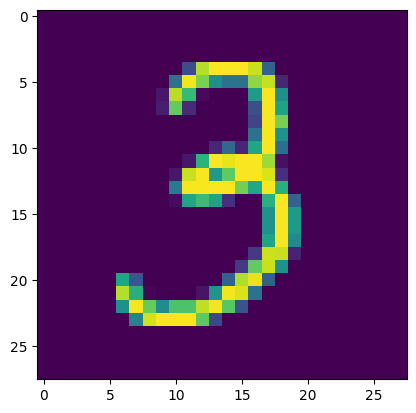

In [ ]:
# Taking look at a random image
random_index = np.random.randint(low=0,high=training_data[0].shape[0],size=1,dtype=int) # Getting a random index
random_example = np.squeeze(training_data[0][random_index],axis=0) # Getting the random example

# Plotting the image
plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
plt.show()

**Supervised Learning**

Before going any further, one must understand the types of machine learning. One of the most common types of machine learning is supervised learning. In supervised learning, you are given a X (some set of features) and a y (some target or the thing you want to predict). Each X is mapped to some y. In supervised learning, the goal is to find a model that can accurately estimate this mapping, f(x).

Hence, in supervised learning, we utilize y to be able to build a "function"/model that can accurately predict y from a given x. There are 2 main types of supervised learning: **Classification** and **Regression**.

Classification deals with predicting discrete classes (like this project!)

Regression deals with predicting continuous values such as stock price prediction.

There are also other types of machine learning such as un-supervised learning and semi-supervised learning. We won't be covering these topics as much (or at all).

In [ ]:
# Splitting up the data into the X (input) and y (labels)
train_x = training_data[0] / 255.0
train_y = training_data[1] # This is what we want our model to be able to predict

test_x = testing_data[0] / 255.0
test_y = testing_data[1]

Note, we divided each pixel value by 255.0. This is because we want to scale the pixels. We perform scaling to speed up training. It is easier to perform calculations on smaller numbers than it is on bigger numbers.

We divide by 255 because this is the range of pixels, [0,255]

In [ ]:
# Checking the shapes of both X & Y
print(f'Shape of X: {train_x.shape}')
print(f'Shape of Y: {train_y.shape}')

Shape of X: (60000, 28, 28)
Shape of Y: (60000,)


In [ ]:
# Making Y a shape of 60000,10 so that we can easily compare the vectors (see later to see what I mean)
train_y = keras.utils.to_categorical(train_y,num_classes=10)
test_y = keras.utils.to_categorical(test_y,num_classes=10)

## Model

How does the model work?

Before we analyze the model, we need to understand the human brain (just a little). The human body is comprised of millions to billions of neurons that send information to the brain and enable the brain to perform actions. For example, if my friend reaches out to shake my hand, my brain takes this information in via neurons, performs some computation, and sends an output that I need to shake my friend's hand.

This is exactly where the idea of neural networks stems from. Note, this relationship between biological neural networks and the computational neural networks has become weaker and weaker over the years. Most ML practioners don't even use it anymore!

**What happens at each neuron?**

We just discussed where neural networks come from, but we haven't discussed how they work. Specifically, we need to address what happens at each node/neuron/unit.

For the sake of example, let's say that our neuron has 3 inputs: x1, x2, and x3. Then, our neuron performs the following calculation:

**output = activation(w1 * x1 + w2 * x2 + w3 * x3 + b)**

As you can see, each neuron takes the weighted summation of the inputs. Each input gets multiplied by the corresponding weight. Then, it is summed up and a bias is added. The activation function is some function (i.e sigmoid, relu, etc) that ensures that the model can capture non-linearity. Without the activation function, our model only be able to capture linear relationships since each neuron would be performing linear calculations (i.e if I have f(x) = 3x and g(x) = 6x, f(g(x)) = 3 * 6x = 9x, which is still a linear function).



**Universal Function Approximation**

Remember how I earlier said that the goal of supervised learning is to be able to approximate the function f(x), where f(x) maps X to Y? Well it turns out, due to the flexibility of neural networks, we can ,in theory, approximate any function f(x). This is called the **universal function approximation theorem**.

In essence, this theorem states that we could in theory approximate any function f(x) using neural networks.

In [ ]:
# Building the model
# In this section, we build the model
# I highly recommend that you experiment with this section
# since this is the juice of the project!

model = Sequential() # Tells Keras to create a fully connected model (each input connects to the next layer)
model.add(Input(shape=(28,28))) # Input layer
model.add(Flatten()) # A layer to flatten the input from 28 x 28 to a vector of 784. ANNs can only take vectors as input for a single example

# Adding the "neurons"
model.add(Dense(units=64,activation='relu')) # Dense layers are our neurons
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax')) # Perform a softmax on the last layer to get probabilities for each class (there are 10 for 10 digits)

In [ ]:
# Checking the model out
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 67466 (263.54 KB)
Trainable params: 67466 (263.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**We built the model. Now what?**

We understand that each neuron, we are taking a weighted summation of the inputs. But how exactly do we get those weights? Initially, a model is initialized with random weights; however, it is very, very unlikely that these weights are the correct ones. Furthermore, there is no database where we can find the proper weights since there are way too many models and problems. Hence, we need a way to "train" the model. Training the model is process of getting the model to find the weights.

**How do we train the model?**

To train the model, we need to understand 3 concepts: loss function, back propagation, and gradient descent.

**Loss Function:** This is a function that tells us how bad our model is. We want to minimize this function, hence is needs to be differentiable (see below for why).

**Back Propagation:** To minimize the loss function, we can utilize derivatives. Derivatives allow us to understand how each weight/parameter affects the loss. By leveraging the chain rule, back propagation is an algorithm that calculates the derivative of the loss with respect to the weight for each weight.

**Gradient Descent:** Gradient descent is an optimization algorithm that helps us minimize the loss. Essentially, it is the following equation:

w_new = w_old - alpha * d/dw * loss

This equation is for every weight in the neural network. We update each weight based on the above equation. The alpha is the learning rate. It is also a hyper parameter (a parameter that we set and not learn). Typically, we set the learning rate to be anywhere from 0.001 to 0.01. The learning rate scales the derivative so that we don't update our weights by a lot each time. The purpose of the learning rate can be better understood with this analogy:

Imagine you are the top of a hill. You would like to get to the bottom; however, there is dense fog around you. You can't see the bottom, nor can you see which direction to go in. Ideally, you would take small steps in the downward direction ,and eventually, you would reach the bottom. This is exactly what gradient descent does! The hill is the loss function and the learning rate is "how big" our step size is. We don't want to take a big step size because this means we might miss the minimum. The derivatives tell us how "steep" the hill is in each direction (our weights).

To summarize, the neural network utilizes back propagation to calculate the derivatives of the loss with respect to each weight. Then, we update each weight using gradient descent. We run gradient descent for multiple epochs. Epochs are how many times we run the training data through the neural network. You can think of an epoch has a step down the hill.

In [ ]:
# Let's compile the the model
# We need to compile the model to set up the optimization algorithm and the loss function
loss_function = 'categorical_crossentropy'
optimizer = keras.optimizers.SGD(learning_rate=0.01)
metrics = ['accuracy']
model.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [ ]:
# Fitting the model to the training data (training the model)
history = model.fit(x=train_x,y=train_y,batch_size=32,epochs=50,shuffle=True) # batch size splits the data into batches for better training

Epoch 1/50
1875/1875 [==============================] - 14s 3ms/step - loss: 0.6973 - accuracy: 0.7988
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.9150
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2306 - accuracy: 0.9320
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1965 - accuracy: 0.9420
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1716 - accuracy: 0.9492
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1532 - accuracy: 0.9546
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1371 - accuracy: 0.9601
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1242 - accuracy: 0.9641
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1135 - accuracy: 0.9670
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.10

The cell above trains the model. Keras is nice and performs back propagation and gradient descent for us, so we don't have to manually perform the calculations.

In [ ]:
# Let's see how the model performs on the test data
model.evaluate(x=test_x,y=test_y,batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9762


[0.09222961962223053, 0.9761999845504761]

The model has a loss of 0.102 and an accuracy of 97.46%. Clearly, there is a a gap between the metrics of the model on the test data and the metrics of the model on the training data. This is because of **overfitting**.

Overfitting is a concept in machine learning which means that the model "memorizes" the training data rather than understanding patterns. Here is an example that better illustrates this concept:

Imagine you are studying for a test. Instead of studying the concepts, you memorize the practice problems. When it comes time to the test, in all liklihood, you will fail because the test isn't the exact same as the practice problems. This is an example of overfitting. The model does really well on the training data, but not as well on the test data.

To minimize overfitting, you can do multiple things:
1. Get more data
2. Regularize, penalize the model or add constraints to the weights

Underfitting is the complete opposite: the model does poorly on the training data and on the testing data.

To minimize underfitting, you can do multiple things:
1. Build a more complex model
2. Get more data

Image Label: 6


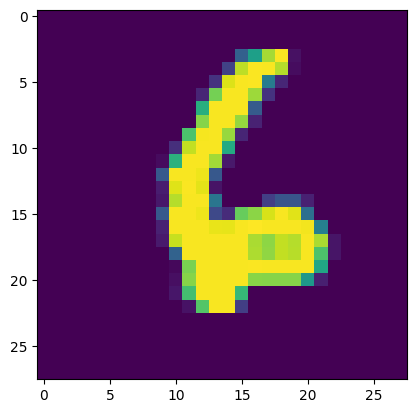

In [ ]:
# Seeing how the model does on a single example in the test set
# Taking look at a random image
random_index = np.random.randint(low=0,high=training_data[0].shape[0],size=1,dtype=int) # Getting a random index
random_example = np.squeeze(training_data[0][random_index],axis=0) # Getting the random example

# Plotting the image
plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
plt.show()

In [ ]:
# Making the prediction
prediction = model.predict(random_example.reshape(1,28,28))
print(f'Actual: {training_data[1][random_index][0]}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 99ms/step
Actual: 6
Model Prediction: 6


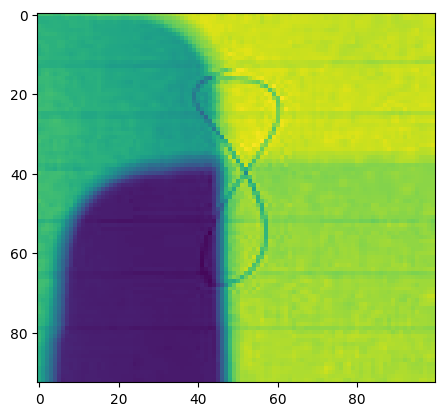

In [ ]:
# Let's see how the model does on our hand writing!
# Make sure to upload your handwritten digit to your Google Drive prior to this!
# No need to upload to a folder or anything, just to your drive is fine
image_path = '/content/drive/MyDrive/Eight.jpg'
handwritten_image = cv2.imread(image_path,0)

# Plot of the image
plt.imshow(handwritten_image)
plt.show()

In [ ]:
# Checking the shape
print(f'Image shape: {handwritten_image.shape}')

Image shape: (93, 100)


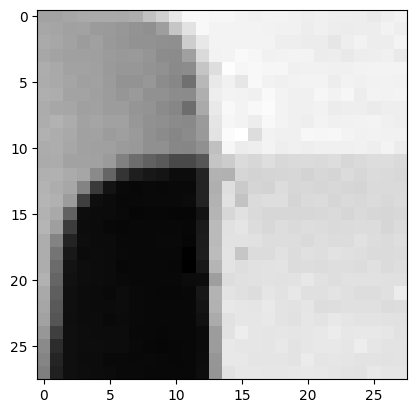

In [ ]:
# Clearly the shape is too big, we need to rescale
handwritten_image = cv2.resize(handwritten_image,(28,28))
plt.imshow(handwritten_image,cmap='gray')
plt.show()# Clearly the shape is too big, we need to rescale

In [ ]:
# The image is very blurry, but you can kind of make out what it is. This is very similar to how
# the real world images are going to be
handwritten_image_array = np.array(handwritten_image) # converting list to numpy
handwritten_image_array = handwritten_image_array.astype('float32') # setting the type
handwritten_image_array = handwritten_image_array / 255.0  # dividing by 255 to scale our data
handwritten_image_array = handwritten_image_array.reshape((1,28,28))
handwritten_image_array.shape # seeing the data shape

(1, 28, 28)

In [ ]:
# Getting the prediction
prediction = model.predict(handwritten_image_array)
print(f'Actual: {8}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 64ms/step
Actual: 8
Model Prediction: 8


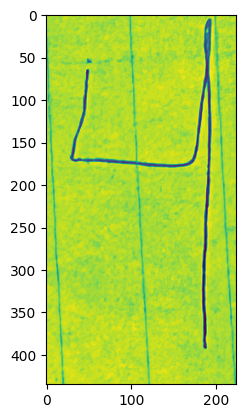

In [ ]:
# Trying out another image
image_path = '/content/drive/MyDrive/Four.jpg'
handwritten_image = cv2.imread(image_path,0)

# Plot of the image
plt.imshow(handwritten_image)
plt.show()

In [ ]:
# Checking the shape
print(f'Image shape: {handwritten_image.shape}')

Image shape: (435, 223)


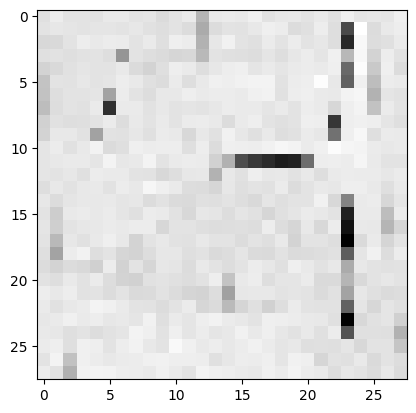

In [ ]:
# Clearly the shape is too big, we need to rescale
handwritten_image = cv2.resize(handwritten_image,(28,28))
plt.imshow(handwritten_image,cmap='gray')
plt.show()# Clearly the shape is too big, we need to rescale

In [ ]:
# The image is very blurry, but you can kind of make out what it is. This is very similar to how
# the real world images are going to be
handwritten_image_array = np.array(handwritten_image) # converting list to numpy
handwritten_image_array = handwritten_image_array.astype('float32') # setting the type
handwritten_image_array = handwritten_image_array / 255.0  # dividing by 255 to scale our data
handwritten_image_array = handwritten_image_array.reshape((1,28,28))
handwritten_image_array.shape # seeing the data shape

(1, 28, 28)

In [ ]:
# Getting the prediction
prediction = model.predict(handwritten_image_array)
print(f'Actual: {4}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 29ms/step
Actual: 4
Model Prediction: 8


Clearly, the model predicts incorrectly. Based on the image, you can kind of see where the confusion is. However, this shows us one thing: the data we train on has to be representative to some degree the data we see in production. The data we trained on is very clean and preprocessed. The data in production wasn't preprocessed so clearly the model struggles.